In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data/train_ver2.csv', dtype={ 'sexo': str, 'age': str, 'ind_nuevo': str, 'indrel_1mes': str,
                                                'antiguedad': str, 'ult_fec_cli_lt': str, 'indext': str, 'conyuemp': str },
                                                 parse_dates=['fecha_dato', 'fecha_alta'])

In [3]:
df.shape

(13647309, 48)

In [4]:
df_copy = df.copy()

### Cantidad de registros por mes

In [6]:
groupby_fecha_dato = df_copy.groupby(['fecha_dato'])
groups_fecha_dato = groupby_fecha_dato.groups

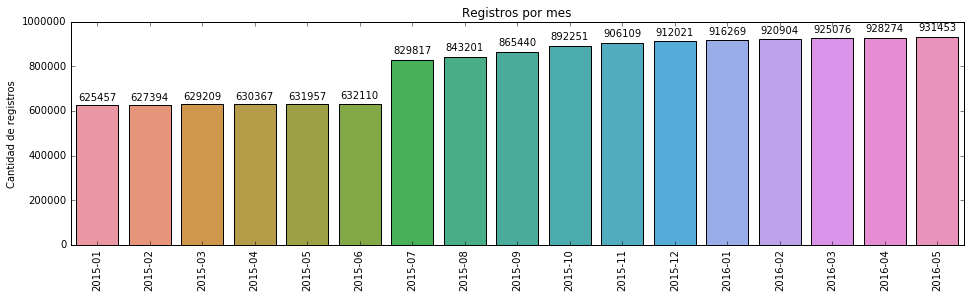

In [37]:
dates = df_copy.fecha_dato.value_counts().sort_index()
index_dates = [str(date).split()[0][:7] for date in dates.index]
count_dates = dates.values

plt.figure(figsize=(16,4))
sns.barplot(index_dates, count_dates)
#plt.plot(count_dates, 'bo', count_dates, '-')

plt.xticks(rotation='vertical')
plt.title('Registros por mes')
plt.ylabel('Cantidad de registros')

for i, count in enumerate(count_dates):
    plt.text(i, count*1.02, count, ha='center', va='bottom')

Diferencia de aumento de registros cada mes

In [21]:
sorted_dates = sorted(groups_fecha_dato.keys())
str_format = "{:<10} - {:<13}|" +  "{:<15}|"*2 + "{:<15} {:<5}"
print(str_format.format('Fecha', '', 'Salidas', 'Nuevos', 'Diferencia', ''))
print('-'*75)

for i in range(1, len(sorted_dates)):
    month_one = set(df['ncodpers'][groups_fecha_dato[sorted_dates[i-1]]].values)
    month_two = set(df['ncodpers'][groups_fecha_dato[sorted_dates[i]]].values)
    
    departures = len(month_one - month_two)
    new = len(month_two - month_one)
    diff = -(departures - new) if (departures - new) < 0 else departures - new
    sent = 'aumenta ^' if (departures - new) < 0 else 'disminuye v'
    
    print(str_format.format(str(sorted_dates[i-1]).split('T')[0], str(sorted_dates[i]).split('T')[0], departures, new, diff, sent))

Fecha      -              |Salidas        |Nuevos         |Diferencia           
---------------------------------------------------------------------------
2015-01-27 - 2015-02-27   |2531           |4468           |1937            aumenta ^
2015-02-27 - 2015-03-27   |2300           |4115           |1815            aumenta ^
2015-03-27 - 2015-04-27   |2511           |3669           |1158            aumenta ^
2015-04-27 - 2015-05-27   |2232           |3822           |1590            aumenta ^
2015-05-27 - 2015-06-27   |3354           |3507           |153             aumenta ^
2015-06-27 - 2015-07-27   |1861           |199568         |197707          aumenta ^
2015-07-27 - 2015-08-27   |1456           |14840          |13384           aumenta ^
2015-08-27 - 2015-09-27   |1406           |23645          |22239           aumenta ^
2015-09-27 - 2015-10-27   |1750           |28561          |26811           aumenta ^
2015-10-27 - 2015-11-27   |2081           |15939          |13858           aum

### Cantidad de productos por mes

In [7]:
df_graph = df_copy.loc[:, ['fecha_dato']].join(df_copy.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1'])
df_graph.shape

(13647309, 25)

In [8]:
df_graph = df_graph.groupby(['fecha_dato']).sum()

Los productos en el *dataset* de train "preprocesado"

In [222]:
df_clean = pd.read_csv('data/clean/train_clean_v2.csv')
df_targets = pd.read_csv('data/clean/train_labels.csv')

In [230]:
df_graph2 = df_graph2.groupby(['fecha_dato']).sum()
df_graph2.shape

(17, 24)

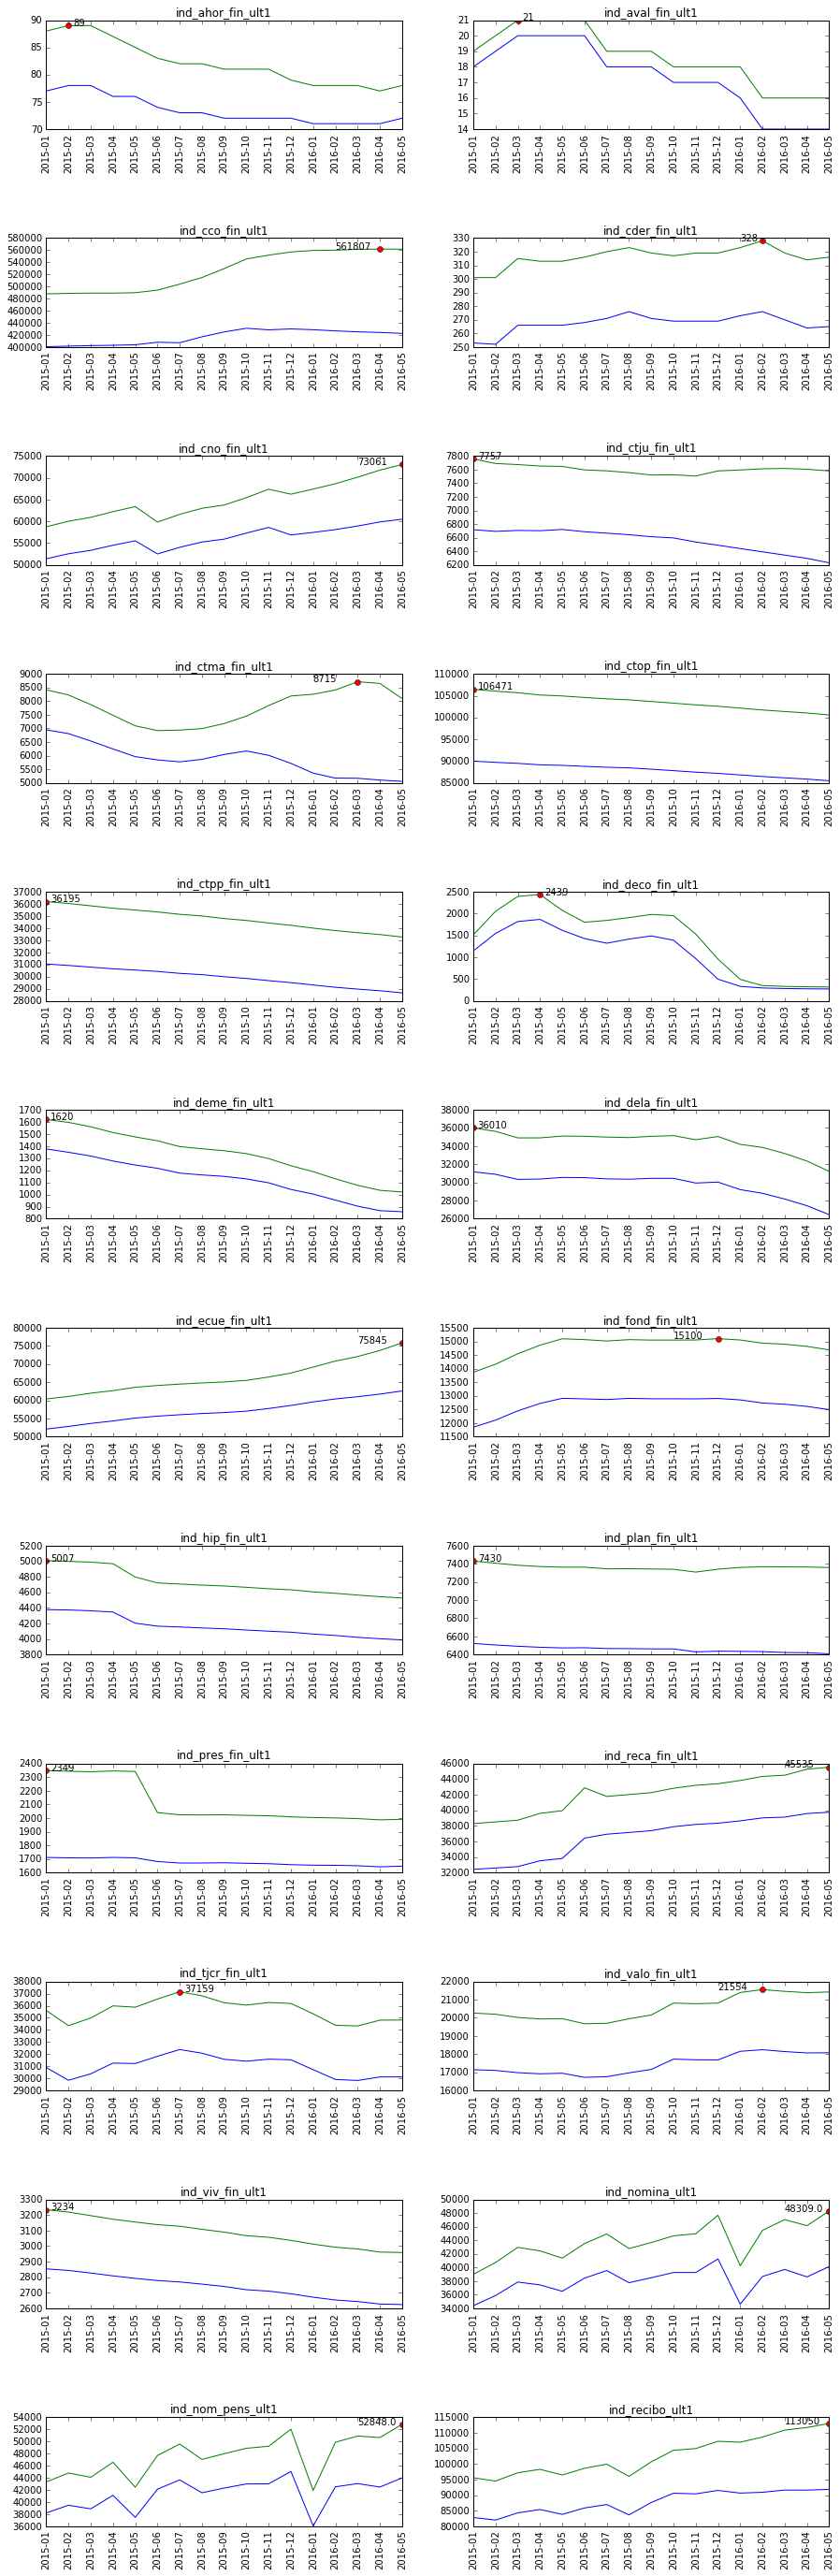

In [234]:
plt.figure(figsize=(15, 48))

x_labels = [str(date).split()[0][:7] for date in df_graph.index]

for i in range(24):
    values = df_graph.iloc[:, i].as_matrix()
    values2 = df_graph2.iloc[:, i].as_matrix()
    
    plt.subplot(12, 2, i+1)
    plt.plot(values, '-', c='g')
    plt.plot(values2, '-', c='b')
    plt.xticks(range(17), x_labels, rotation='vertical')
    #plt.ylim((np.min(values), np.max(values)*1.05))
    
    xmax = np.argmax(values)
    ymax = np.max(values)
    xmax_pos = xmax + 0.2 if xmax < int(len(values)/2) else xmax - 1 if len(str(ymax)) <= 3 else xmax - 2    
    plt.plot(xmax, ymax, 'o', c='r')
    plt.annotate(ymax, (xmax_pos, ymax))
    
    plt.title(df_graph.columns.tolist()[i])
    
plt.subplots_adjust(hspace=1)

In [273]:
targets = df_graph.columns.tolist()
scores = [0.9659, 0.9647, 0.8726, 0.9404,
          0.8864, 0.9984, 0.9758, 0.9038,
          0.9225, 0.9858, 0.9246, 0.9263,
          0.9020, 0.9280, 0.9244, 0.929,
          0.981, 0.9, 0.8795, 0.9175,
          0.9268, 0.8818, 0.8832, 0.8928]

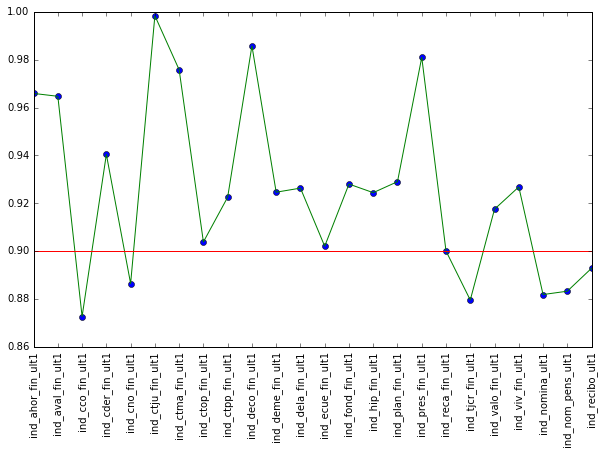

In [281]:
plt.figure(figsize=(10, 6))
plt.xticks(range(len(scores)), targets, rotation='vertical')
plt.plot(scores, 'o', scores, '-')
plt.plot(np.zeros(len(scores))+0.9, '-')